In [1]:
# seed setting

import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
# importing necessary libraries

import os
import json
from zipfile import ZipFile

from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
# getting dataset via API

kaggle_cred = json.load(open("kaggle.json"))

In [4]:
os.environ['KAGGLE_USERNAME'] = kaggle_cred['username']
os.environ['KAGGLE_API_KEY'] = kaggle_cred['key']

In [8]:
# downloading dataset

!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
... resuming from 714080256 bytes (1475306163 bytes left) ...




 33%|###2      | 681M/2.04G [00:00<?, ?B/s]
 33%|###2      | 682M/2.04G [00:01<36:01, 682kB/s]
 33%|###2      | 683M/2.04G [00:02<26:46, 917kB/s]
 33%|###2      | 684M/2.04G [00:03<23:30, 1.04MB/s]
 33%|###2      | 685M/2.04G [00:04<22:01, 1.11MB/s]
 33%|###2      | 686M/2.04G [00:04<21:08, 1.16MB/s]
 33%|###2      | 687M/2.04G [00:05<20:38, 1.19MB/s]
 33%|###2      | 688M/2.04G [00:06<21:04, 1.16MB/s]
 33%|###2      | 689M/2.04G [00:07<20:40, 1.18MB/s]
 33%|###3      | 690M/2.04G [00:08<20:21, 1.20MB/s]
 33%|###3      | 691M/2.04G [00:09<20:06, 1.21MB/s]
 33%|###3      | 692M/2.04G [00:10<19:58, 1.22MB/s]
 33%|###3      | 693M/2.04G [00:10<19:51, 1.23MB/s]
 33%|###3      | 694M/2.04G [00:11<20:32, 1.19MB/s]
 33%|###3      | 695M/2.04G [00:12<20:13, 1.20MB/s]
 33%|###3      | 696M/2.04G [00:13<20:01, 1.22MB/s]
 33%|###3      | 697M/2.04G [00:14<19:55, 1.22MB/s]
 33%|###3      | 698M/2.04G [00:15<20:06, 1.21MB/s]
 33%|###3      | 699M/2.04G [00:16<20:08, 1.20MB/s]
 34%|###3      | 700M

In [9]:
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
print(os.listdir("plantvillage dataset"))
print("--------------------------------------------------------------------------------------------------------------")


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])
print("--------------------------------------------------------------------------------------------------------------")

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])
print("--------------------------------------------------------------------------------------------------------------")

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale"))
print("--------------------------------------------------------------------------------------------------------------")

['color', 'grayscale', 'segmented']
--------------------------------------------------------------------------------------------------------------
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
--------------------------------------------------------------------------------------------------------------
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
--------------------------------------------------------------------------------------------------------------
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles

In [6]:
print(len(os.listdir("plantvillage dataset/color/Tomato___healthy")))
print(os.listdir("plantvillage dataset/color/Tomato___healthy")[:5])

1591
['000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG', '000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG', '0031da2a-8edd-468f-a8b1-106657717a32___RS_HL 0105.JPG', '003944fc-3b99-4a0f-9ed4-0e07352fd8b3___RS_HL 9844.JPG', '00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223.JPG']


In [7]:
print(len(os.listdir("plantvillage dataset/color/Tomato___healthy")))
print(os.listdir("plantvillage dataset/color/Tomato___healthy")[:5])

1591
['000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG', '000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG', '0031da2a-8edd-468f-a8b1-106657717a32___RS_HL 0105.JPG', '003944fc-3b99-4a0f-9ed4-0e07352fd8b3___RS_HL 9844.JPG', '00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223.JPG']


# Data Preprocessing

(256, 256, 3)
196608 = 196608


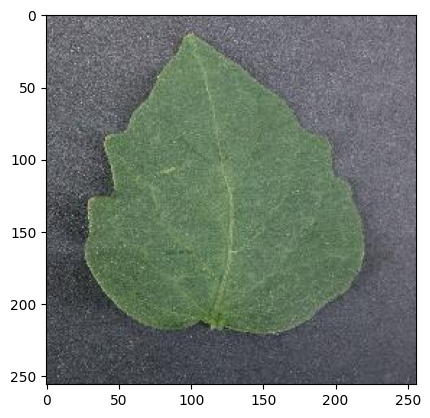

In [8]:
base_dir = "plantvillage dataset/color"
img_path = "plantvillage dataset/color/Tomato___healthy/000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG"

tmt_img = img.imread(img_path)

print(tmt_img.shape)
print(f"{256*256*3} = {tmt_img.size}")
plt.imshow(tmt_img)
plt.show()

In [9]:
# matrix format

print(tmt_img)

[[[135 134 140]
  [117 116 122]
  [ 98  97 103]
  ...
  [118 115 126]
  [141 138 149]
  [118 115 126]]

 [[112 111 117]
  [106 105 111]
  [124 123 129]
  ...
  [112 109 120]
  [113 110 121]
  [125 122 133]]

 [[132 131 137]
  [148 147 153]
  [161 160 166]
  ...
  [106 103 114]
  [108 105 116]
  [127 124 135]]

 ...

 [[ 74  77  82]
  [ 85  88  93]
  [ 73  76  81]
  ...
  [ 87  87  97]
  [ 71  71  81]
  [ 82  82  92]]

 [[ 66  69  74]
  [ 64  67  72]
  [ 55  58  63]
  ...
  [ 76  76  86]
  [ 80  80  90]
  [ 94  94 104]]

 [[ 71  74  79]
  [ 57  60  65]
  [ 51  54  59]
  ...
  [ 73  73  83]
  [ 82  82  92]
  [ 86  86  96]]]


# Splitting into Train & Test data sets

In [10]:
# seeting all the images size to 224px and setting training batch size

img_size = 224
batch_size = 32

In [11]:
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [12]:
# trainging data generation

train_gen = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = "training",
    class_mode = "categorical"
)

Found 43456 images belonging to 38 classes.


In [13]:
# validataion data generator

val_gen = data_gen.flow_from_directory(
    base_dir, 
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = "validation",
    class_mode = "categorical"
)

Found 10849 images belonging to 38 classes.


# Model Making &Training

In [14]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dense(train_gen.num_classes, activation = "softmax"))

C:\Users\91934\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(
    train_gen,
    steps_per_epoch = train_gen.samples//batch_size,
    epochs = 5,
    validation_data = val_gen,
    validation_steps = val_gen.samples//batch_size
)

Epoch 1/5


C:\Users\91934\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1480s 1s/step - accuracy: 0.6043 - loss: 1.8645 - val_accuracy: 0.8314 - val_loss: 0.5335
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 26us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.3414
Epoch 3/5


C:\Users\91934\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1062s 782ms/step - accuracy: 0.9178 - loss: 0.2603 - val_accuracy: 0.8756 - val_loss: 0.4187
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.9073e-06
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1412s 1s/step - accuracy: 0.9683 - loss: 0.0993 - val_accuracy: 0.8797 - val_loss: 0.4573


In [18]:
history.params

{'verbose': 'auto', 'epochs': 5, 'steps': 1358}

In [19]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

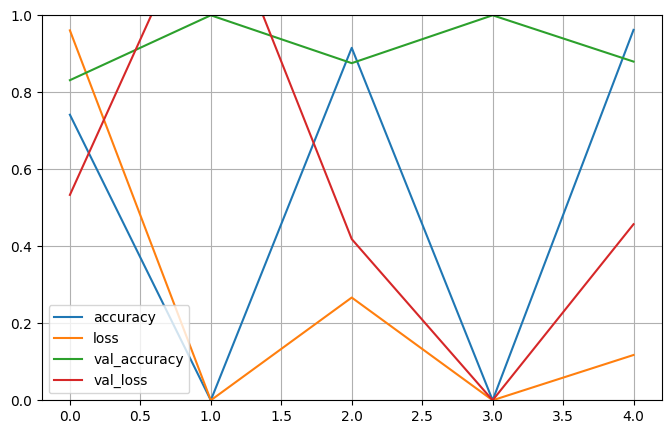

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

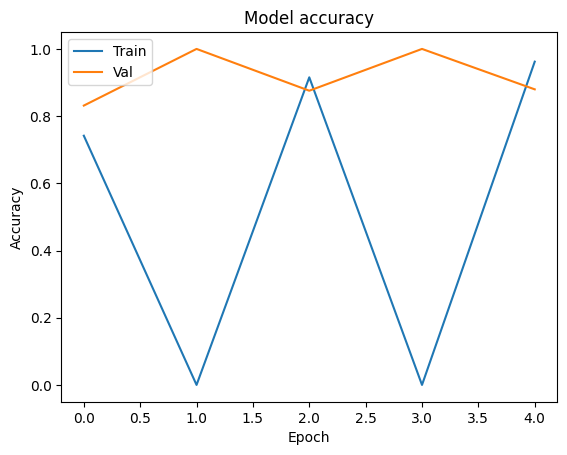

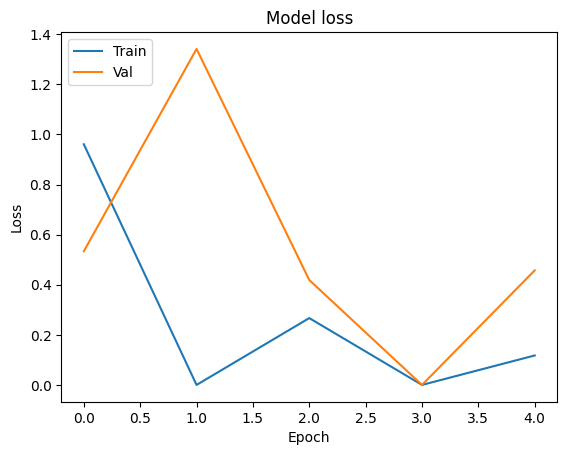

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [24]:
val_loss, val_accuracy = model.evaluate(val_gen, steps=val_gen.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

339/339 ━━━━━━━━━━━━━━━━━━━━ 47s 139ms/step - accuracy: 0.8828 - loss: 0.4506
Validation Accuracy: 87.97%


# Predictive System

In [25]:
# loading and preprocessing the image

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path).resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.
    return img_array

In [26]:
# Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [28]:
class_indices = {v: k for k, v in train_gen.class_indices.items()}

In [29]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [30]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [41]:
import fnmatch

def get_image_paths(directory, extensions=['*.jpg', '*.jpeg', '*.png', '*.gif', '*.bmp']):
    matches = []
    for root, dirnames, filenames in os.walk(directory):
        for extension in extensions:
            for filename in fnmatch.filter(filenames, extension):
                matches.append(os.path.join(root, filename))
    return matches

In [42]:
directory = "TestImages"
image_paths = get_image_paths(directory)

print(image_paths)
print("Guna")

for image_path in image_paths:
    predicted_class_name = predict_image_class(model, image_path, class_indices)
    print("Predicted Class Name:", predicted_class_name)

['TestImages\\01e94c43-0879-4e8c-9b61-c48cfed88dab___JR_FrgE.S 3024.JPG', 'TestImages\\0a22f50a-5f25-4cf6-816b-76cae94b7f30___GCREC_Bact.Sp 6103.JPG', 'TestImages\\0af43534-4ce9-4c28-a873-abb7c05573dd___UF.Citrus_HLB_Lab 0113.JPG', 'TestImages\\0be9d721-82f5-42c3-b535-7494afe01dbe___RS_HL 1814.JPG', 'TestImages\\1a926013-428a-4f3a-bb9d-71ae74eb5105___R.S_HL 8157 copy.jpg']
Guna
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Predicted Class Name: Apple___Black_rot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted Class Name: Tomato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Class Name: Orange___Haunglongbing_(Citrus_greening)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted Class Name: Pepper,_bell___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted Class Name: Corn_(maize)___healthy


In [43]:
model.save('plant_disease_prediction_model.h5')

In [44]:
model.save('my_model.keras')